<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/drewalessi/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part I: Experimental Setup**

The experiment analyzed data gathered by my phone's 3-axis accelerometer during a free fall of 1.65 m.

Accelerometer Data from Phyphox:

- Rate: 438.0 Hz

- Average: 9.775 m/s^2

- Standard Deviation: 0.015 m/s^2



**Part II: Data Analysis**

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
# Read raw data
data_URI = 'https://raw.githubusercontent.com/ubsuny/PHY386/refs/heads/Homework2025/2025/HW/drewalessi/data/Acceleration%20without%20g.csv'
data = pd.read_csv(data_URI, index_col=0)

<Axes: xlabel='Time (s)'>

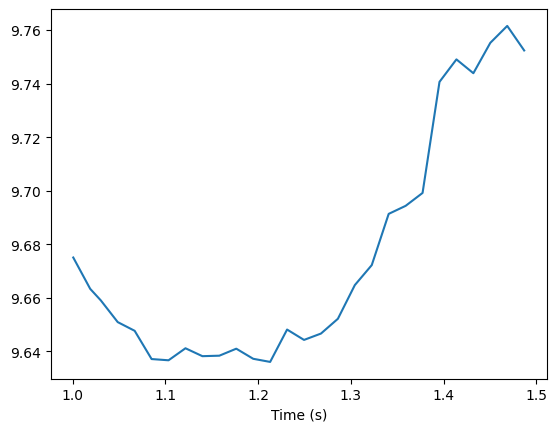

In [16]:
# Plot data for time of free-fall
data['Absolute acceleration (m/s^2)'][(data['Absolute acceleration (m/s^2)'].index<1.5) & (data['Absolute acceleration (m/s^2)'].index>1.0)].plot()

**Part III: Model Fitting and Visualization**

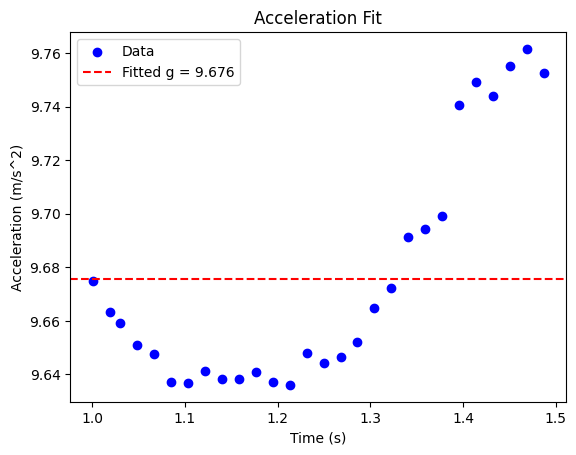

g = 9.676 +/- 0.008 m/s^2


In [50]:
# Define the constant function
def fit_constant_func(x, g):
    """ Fit function for a constant value of gravitational acceleration (g) independent from time"""
    return g

# Perform curve fitting
params, covariance = curve_fit(fit_constant_func, data.index[(data.index<1.5) & (data.index>1.0)], data['Absolute acceleration (m/s^2)'][(data['Absolute acceleration (m/s^2)'].index<1.5) & (data['Absolute acceleration (m/s^2)'].index>1.0)])
fitted_g = params[0]

#Plot the data and fitted curve
plt.scatter(data.index[(data.index<1.5) & (data.index>1.0)], data['Absolute acceleration (m/s^2)'][(data['Absolute acceleration (m/s^2)'].index<1.5) & (data['Absolute acceleration (m/s^2)'].index>1.0)], label="Data", color="blue")
plt.axhline(fitted_g, color="red", linestyle="--", label= "Fitted g = {:.3f}".format(fitted_g))
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.title("Acceleration Fit")
plt.legend()
plt.show()

# Compute standard deviation of data
sdev = np.sqrt(np.diag(covariance))

# Print results
print("g = {:.3f} +/- {:.3f} m/s^2".format(fitted_g, sdev[0]))

**Part IV: Advanced Visualization**

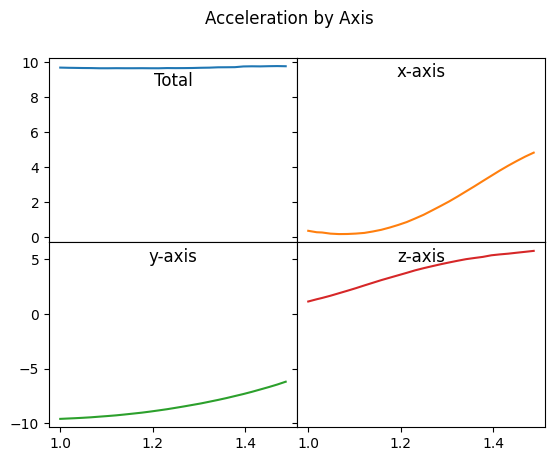

In [45]:
# Plot Total acceleration, x-, y-, and z-axis acceleration side by side
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Acceleration by Axis')
ax1.plot(data['Absolute acceleration (m/s^2)'][(data['Absolute acceleration (m/s^2)'].index<1.5) & (data['Absolute acceleration (m/s^2)'].index>1.0)])
ax1.set_title('Total', y=1.0, pad=-20)
ax2.plot(data['Linear Acceleration x (m/s^2)'][(data['Linear Acceleration x (m/s^2)'].index<1.5) & (data['Linear Acceleration x (m/s^2)'].index>1.0)], 'tab:orange')
ax2.set_title('x-axis', y=1.0, pad=-14)
ax3.plot(data['Linear Acceleration y (m/s^2)'][(data['Linear Acceleration y (m/s^2)'].index<1.5) & (data['Linear Acceleration y (m/s^2)'].index>1.0)], 'tab:green')
ax3.set_title('y-axis', y=1.0, pad=-14)
ax4.plot(data['Linear Acceleration z (m/s^2)'][(data['Linear Acceleration z (m/s^2)'].index<1.5) & (data['Linear Acceleration z (m/s^2)'].index>1.0)], 'tab:red')
ax4.set_title('z-axis', y=1.0, pad=-14)

for ax in fig.get_axes():
    ax.label_outer()

**Part V: Error Propagation and Reporting**

The Phyphox sensors state a standard deviation of 0.015 m/s^2.

According to NOAA's geoid calculator, the height at the location of the experiment was -35.292 m, with an error of 0.036 m (at 95% confidence interval)

Local gravitational acceleration is then found by using the formula

${\displaystyle g_{h}=g_{0}\left({\frac {R_{\mathrm {e} }}{R_{\mathrm {e} }+h}}\right)^{2}}$

Where

- gh is the local gravitational acceleration at height h above sea level.

- Re is the Earth's mean radius = 6,371.00877 km

- g0 is the standard gravitational acceleration = 9.80665 m/s^2

- h is the local height = -35.292 m

In [54]:
# Calculate local g

g0 = 9.80676
Re = 6371008.77
h = -35.292
gh = g0*((Re/(Re+h))**2)
print("Applying the above formula results in a local gravitational acceleration of {:.5f} m/s^2".format(gh))

Applying the above formula results in a local gravitational acceleration of 9.80687 m/s^2


In [52]:
# Percent error of experimental data vs. standard value

g = 9.676
pe = ((g-gh)/gh)*100

print("The percent error of the experimental data is {:.2f}%".format(pe))

The percent error of the experimental data is -1.33%


Neither the standard value for local gravitational acceleration nor the stated average value on the Phyphox sensors agreed with the experimental data within the calculated error bounds. Several sources of error may have contributed to this discrepancy. The Phyphox sensors may not have been properly calibrated. Rotation during freefall may have distorted measurements, although changes in acceleration along one axis should have been offset by changes along another axis. This model does not account for non-gravitational forces, such as air resistance (which would change depending on the orientation of the phone as it rotated due to its asymmetric shape). If the experiment were repeated over a much larger distance, the spatial dependence of the gravitational acceleration would need to be accounted for, though in the current experiment the effect would be insignificant.